In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [2]:
siniestros = pd.read_csv('siniestros_viales.csv')

In [12]:
siniestros["Num_victimas"].describe()

count    717.000000
mean       1.061367
std        0.257024
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Num_victimas, dtype: float64

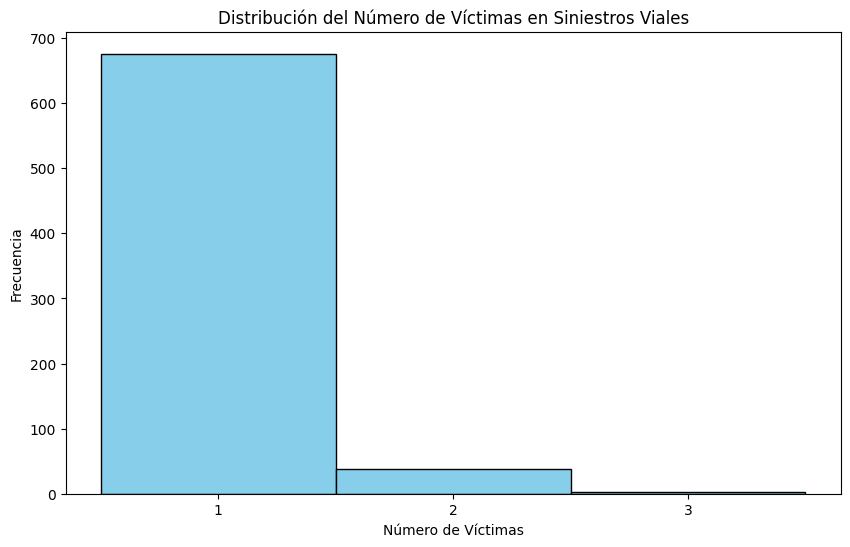

In [3]:
# Visualizar un histograma del número de víctimas
plt.figure(figsize=(10, 6))
plt.hist(siniestros['Num_victimas'], bins=range(1,5), color='skyblue', edgecolor='black')
plt.title('Distribución del Número de Víctimas en Siniestros Viales')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.xticks([tick + 0.5 for tick in range(1, 4)], range(1, 4))
plt.show()

En esta Distribucion se denota que el 80% del numero de victimas son 1. es poco muy poco probable que haya 3 victimas fatales por siniestro

In [20]:
siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     717 non-null    object 
 1   Fecha                  717 non-null    object 
 2   Año                    717 non-null    int64  
 3   Mes                    717 non-null    int64  
 4   Dia                    717 non-null    int64  
 5   Dia semana             717 non-null    object 
 6   Hora completa          717 non-null    object 
 7   Hora                   717 non-null    Int64  
 8   Num_victimas           717 non-null    int64  
 9   Participantes          717 non-null    object 
 10  Rol                    717 non-null    object 
 11  Acusado                717 non-null    object 
 12  Victima                717 non-null    object 
 13  Sexo                   717 non-null    object 
 14  Edad                   717 non-null    int64  
 15  Rango 

In [19]:
siniestros["Hora"].unique()

<IntegerArray>
[ 4,  1,  7,  0,  5, 18, 19, 15, 11, 22, 16,  9, 23,  6, 10, 17, 12,  8, 20,
 21, 14,  3,  2, 13]
Length: 24, dtype: Int64

In [17]:
siniestros["Hora"] = siniestros["Hora"].fillna(0.0)

In [18]:
siniestros["Hora"] = siniestros["Hora"].astype("Int64")

In [22]:
siniestros.isnull().sum()

Id                         0
Fecha                      0
Año                        0
Mes                        0
Dia                        0
Dia semana                 0
Hora completa              0
Hora                       0
Num_victimas               0
Participantes              0
Rol                        0
Acusado                    0
Victima                    0
Sexo                       0
Edad                       0
Rango etario               0
Fecha fallecimiento       69
Lugar del hecho            0
Tipo de calle              0
Calle                      1
Cruce                    177
Dirección normalizada      9
Comuna                     0
Barrios                    2
X caba                     0
Y caba                     0
Pos x                     13
Pos y                     13
dtype: int64

In [21]:
siniestros.duplicated().sum()

0

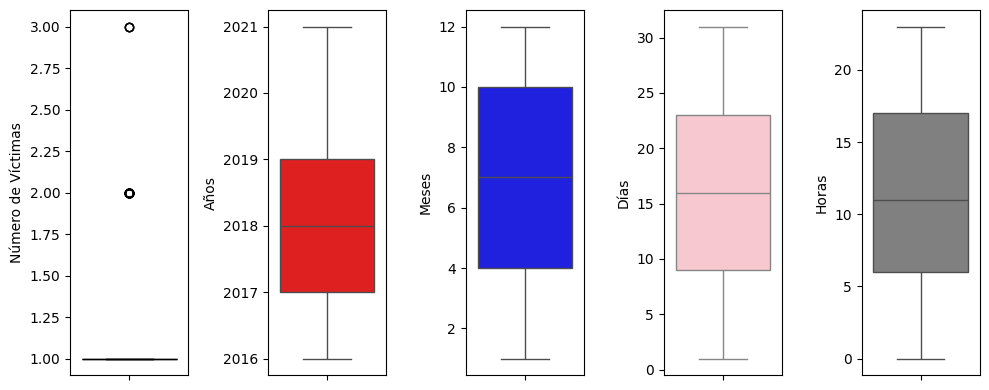

In [14]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=siniestros, y='Num_victimas', color = "black")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=siniestros, y='Año', color = "red")
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=siniestros, y='Mes', color = "blue")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=siniestros, y='Dia', color = "pink")
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.boxplot(data=siniestros, y='Hora', color = "grey")
plt.ylabel('Horas')
# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

Los outliers que se en encuentran en el numero de victimas es debido a que el mayor numero de victimas es 1 con respecto a las demas. 
Tambien se denota que el grueso de victimas se dio entre 2017 y 2019, lo corroborare con otro grafico.

In [14]:
vic_tiempo = siniestros.groupby(['Año', 'Mes'])['Num_victimas'].sum().reset_index()
vic_tiempo

,Año,Mes,Num_victimas
0,2016,1,8
1,2016,2,12
2,2016,3,15
3,2016,4,11
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


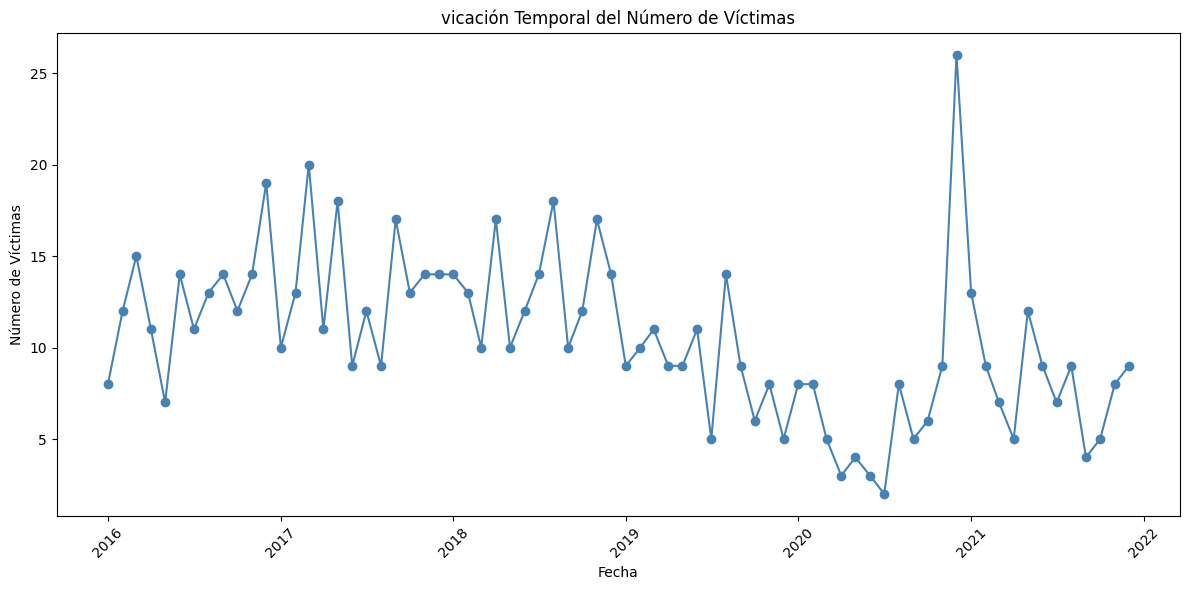

In [45]:
# Combinar AÑO y MES para obtener una sola variable de tiempo, creando la columna "Fecha" como str
vic_tiempo["Fecha"] = vic_tiempo["Año"].astype(str) + '-' + vic_tiempo["Mes"].astype(str)

# Convertir la variable de tiempo a formato datetime
vic_tiempo["Fecha"] = pd.to_datetime(vic_tiempo["Fecha"])

# Ordenar el DataFrame por fecha para que tenga orden cronológico
vic_tiempo = vic_tiempo.sort_values("Fecha")

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(vic_tiempo["Fecha"], vic_tiempo["Num_victimas"], marker='o', color='steelblue')

# Añadir títulos y etiquetas
plt.title('Número de Víctimas en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



Como intuia, el mayor numero de victimas en promedio se dio entre 2017 y 2019. en 2020 fue el pico mas bajo de muertes, asumo que es debido al inicio del COVID19 y en 2021 hubo un pico muy alto de victimas, investigare para saber si el COVID tuvo algo que ver

C:\Users\pao_i\AppData\Local\Temp\ipykernel_22280\1962448193.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Mes', y='Num_victimas', data=data, palette="winter")


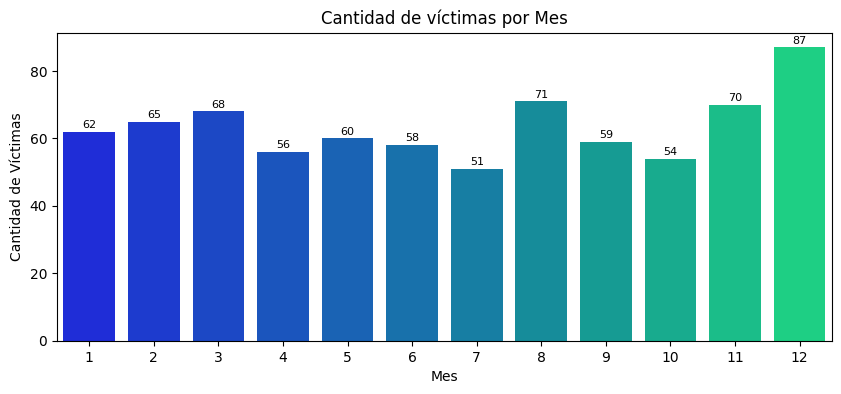

In [47]:
# Se agrupa por la cantidad de víctimas por mes
data = siniestros.groupby(['Mes'])['Num_victimas'].sum().reset_index()
data["Mes"]=data["Mes"].astype("Int64")

# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Mes', y='Num_victimas', data=data, palette="winter")
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

In [48]:
# Se agrupa por la cantidad de víctimas por dia semana
data = siniestros.groupby(['Dia semana'])['Num_victimas'].sum().reset_index()

# Define el orden de los días de la semana
orden_semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

# Crea una columna 'Orden_semana' en el DataFrame para representar el orden numérico de los días de la semana
data['Orden_semana'] = data['Dia semana'].apply(lambda x: orden_semana.index(x))

# Ordena el DataFrame según el orden numérico de los días de la semana
data = data.sort_values(by='Orden_semana')

C:\Users\pao_i\AppData\Local\Temp\ipykernel_22280\3455983199.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Dia semana', y='Num_victimas', data=data, palette="winter")


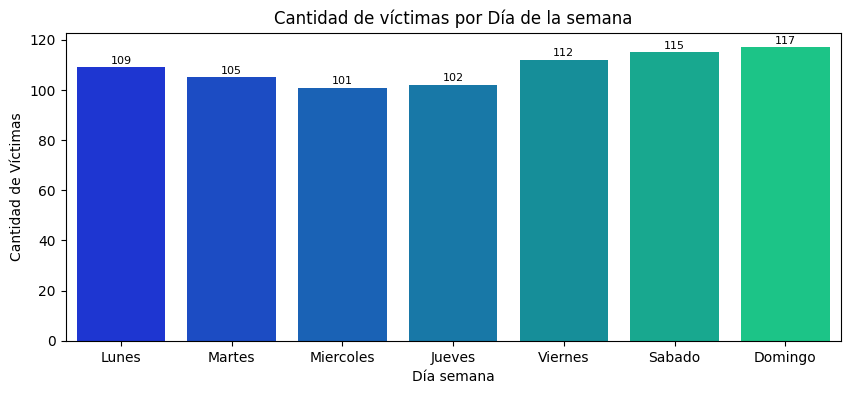

In [49]:
# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Dia semana', y='Num_victimas', data=data, palette="winter")
ax.set_title('Cantidad de víctimas por Día de la semana')
ax.set_xlabel('Día semana') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

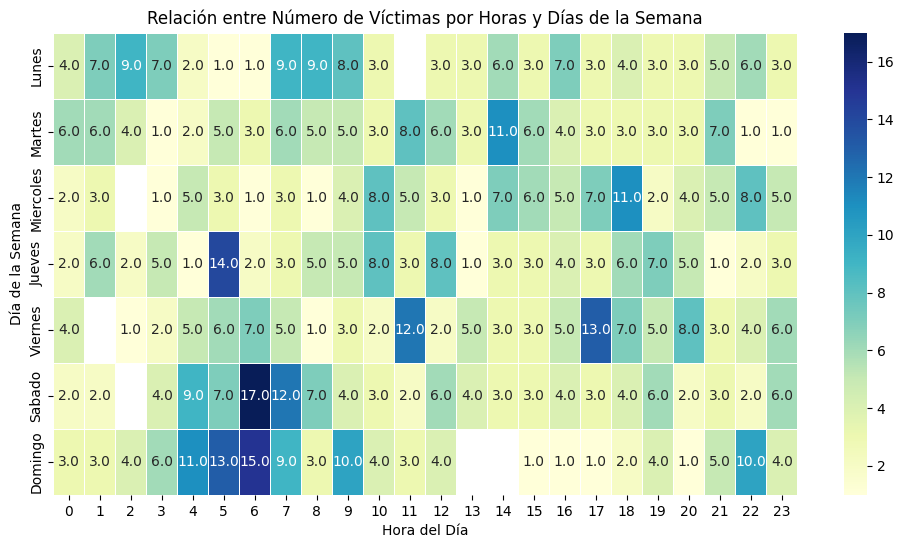

In [50]:
#Agrupa los datos en cantidad de victimas por dia de la semana y horas 
data = siniestros.groupby(['Dia semana', "Hora"])['Num_victimas'].sum().reset_index()

# Define el orden de los días de la semana
orden_dia_hora = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

# Crea una columna 'orden_dia_hora' en el DataFrame para representar el orden numérico de los días de la semana
data['orden_dia_hora'] = data['Dia semana'].apply(lambda x: orden_dia_hora.index(x))

# Ordena el DataFrame según el orden numérico de los días de la semana
data = data.sort_values(by='orden_dia_hora')

# Crear una tabla pivot para los datos
pivot_data = data.pivot_table(index= 'Dia semana', columns='Hora', values='Num_victimas', aggfunc='sum')
pivot_data = pivot_data.reindex(orden_dia_hora)

# Crear un mapa de calor (heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)

# Configurar etiquetas y título
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.title('Relación entre Número de Víctimas por Horas y Días de la Semana')

# Mostrar el gráfico
plt.show()

La mayor concentracion de victimas por mes son en diciembre con 86, puede deberse al hecho de vacaciones y dias festivos.
los fines de semana son los que tienen mayor numero de victimas, puede deberse al hecho de salir de fiesta y volver de madrugada intoxicado, que tambien se denota ese hecho por las horas en las que suceden los siniestros. tambien se dan en los dias de semana pero durante las horas de entrada y salida del trabajo es donde mas se dan los homicidios.
los jueves a las 5 am tiene un pico alto de siniestros, investigare a que se debe

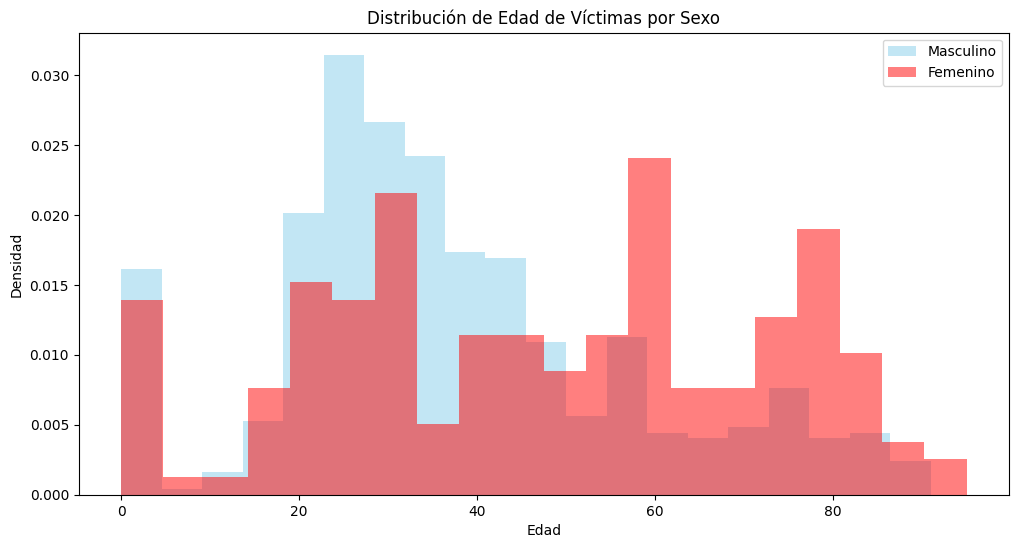

In [29]:
# Filtrar por sexo masculino
masculino = siniestros[siniestros['Sexo'] == 'MASCULINO']['Edad']

# Filtrar por sexo femenino
femenino = siniestros[siniestros['Sexo'] == 'FEMENINO']['Edad']

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(masculino, bins=20, alpha=0.5, color='skyblue', label='Masculino', density=True)
plt.hist(femenino, bins=20, alpha=0.5, color='red', label='Femenino', density=True)
plt.title('Distribución de Edad de Víctimas por Sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

C:\Users\pao_i\AppData\Local\Temp\ipykernel_15692\1722043441.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Año', y='Edad', data=siniestros, palette="winter")


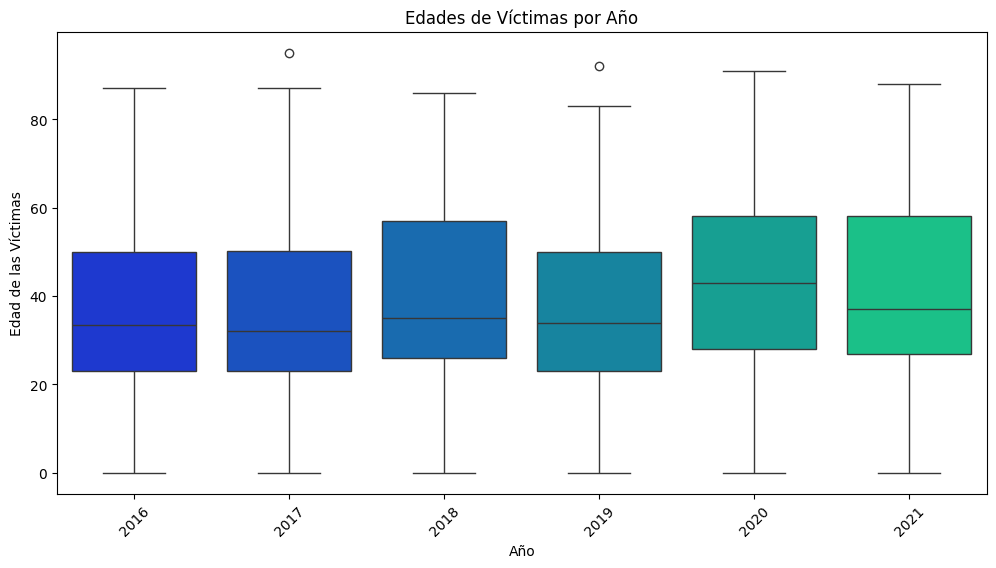

In [12]:
#Agrupa los datos en cantidad de victimas por edad y  año
data = siniestros.groupby(['Edad', "Año"])['Num_victimas'].sum().reset_index()

#Se crea el gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Edad', data=siniestros, palette="winter")
plt.title('Edades de Víctimas por Año') ; plt.xlabel('Año') ; plt.ylabel('Edad de las Víctimas')
plt.xticks(rotation=45)
plt.show()

c:\Users\pao_i\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

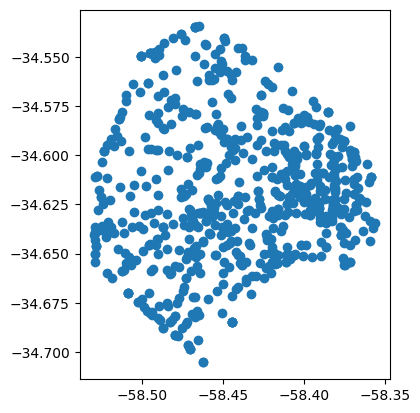

In [6]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(siniestros["Pos x"], siniestros["Pos y"])]
geodata=gpd.GeoDataFrame(siniestros,crs=crs, geometry=geometry)
geodata.plot()

In [10]:
comuna = gpd.read_file(r"comunas_wgs84.shp")

Text(158.98305973900304, 0.5, 'Latitud')

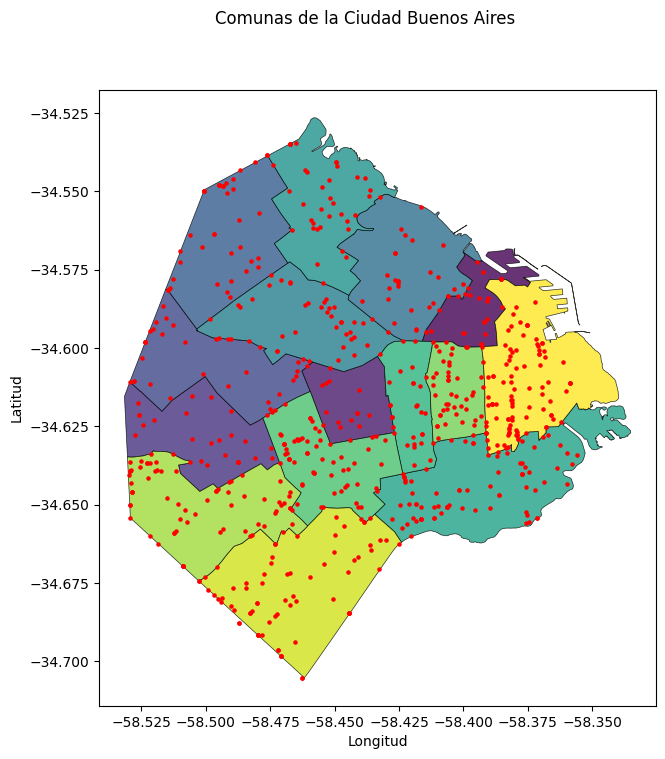

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
comuna.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=0.8,linewidth=0.5,cmap="viridis")
geodata.plot(ax=ax, color='red', markersize=5);
fig.suptitle('Comunas de la Ciudad Buenos Aires', fontsize=12)
ax.set_xlabel('Longitud', fontsize=10)
ax.set_ylabel('Latitud', fontsize='medium')